In [2]:
import geopandas as gpd
import pandas as pd
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import datetime
from tqdm.notebook import tqdm

In [3]:
def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")


In [4]:
mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)

In [5]:
cwd = Path.cwd()
dc2 = cwd.parent
preDF = pd.read_csv(dc2.joinpath("data/predicted_df.csv"))
preDF.drop(columns=["Unnamed: 0"], inplace=True)


In [6]:
preDF.describe()

Prediction  Total Burglaries  Prediction_Normalized  \
count  2532.000000       2532.000000           2.532000e+03   
mean      1.415143          1.407188           5.587887e-08   
std       1.327880          1.437653           1.000000e+00   
min      -0.263718          0.000000          -1.264317e+00   
25%       0.053562          0.000000          -1.025380e+00   
50%       1.157407          1.000000          -1.940958e-01   
75%       2.138295          2.000000           5.445919e-01   
max       8.892371         15.000000           5.630954e+00   

       Total_Burglaries_Normalized  Prediction_Severity_Norm  \
count                 2.532000e+03               2532.000000   
mean                 -1.361504e-10                  4.500000   
std                   1.000000e+00                  2.874499   
min                  -9.788091e-01                  0.000000   
25%                  -9.788091e-01                  2.000000   
50%                  -2.832310e-01                  4.500000   
75%                   4.123470e-01                  7.000000   
max                   9.454861e+00                  9.000000   

       Burglaries_Severity_Norm  Prediction_Severity  Burglaries_Severity  
count               2532.000000          2532.000000          2532.000000  
mean                   4.500000             4.500000             4.500000  
std                    2.874499             2.874499             2.874499  
min                    0.000000             0.000000             0.000000  
25%                    2.000000             2.000000             2.000000  
50%                    4.500000             4.500000             4.500000  
75%                    7.000000             7.000000             7.000000  
max                    9.000000             9.000000             9.000000

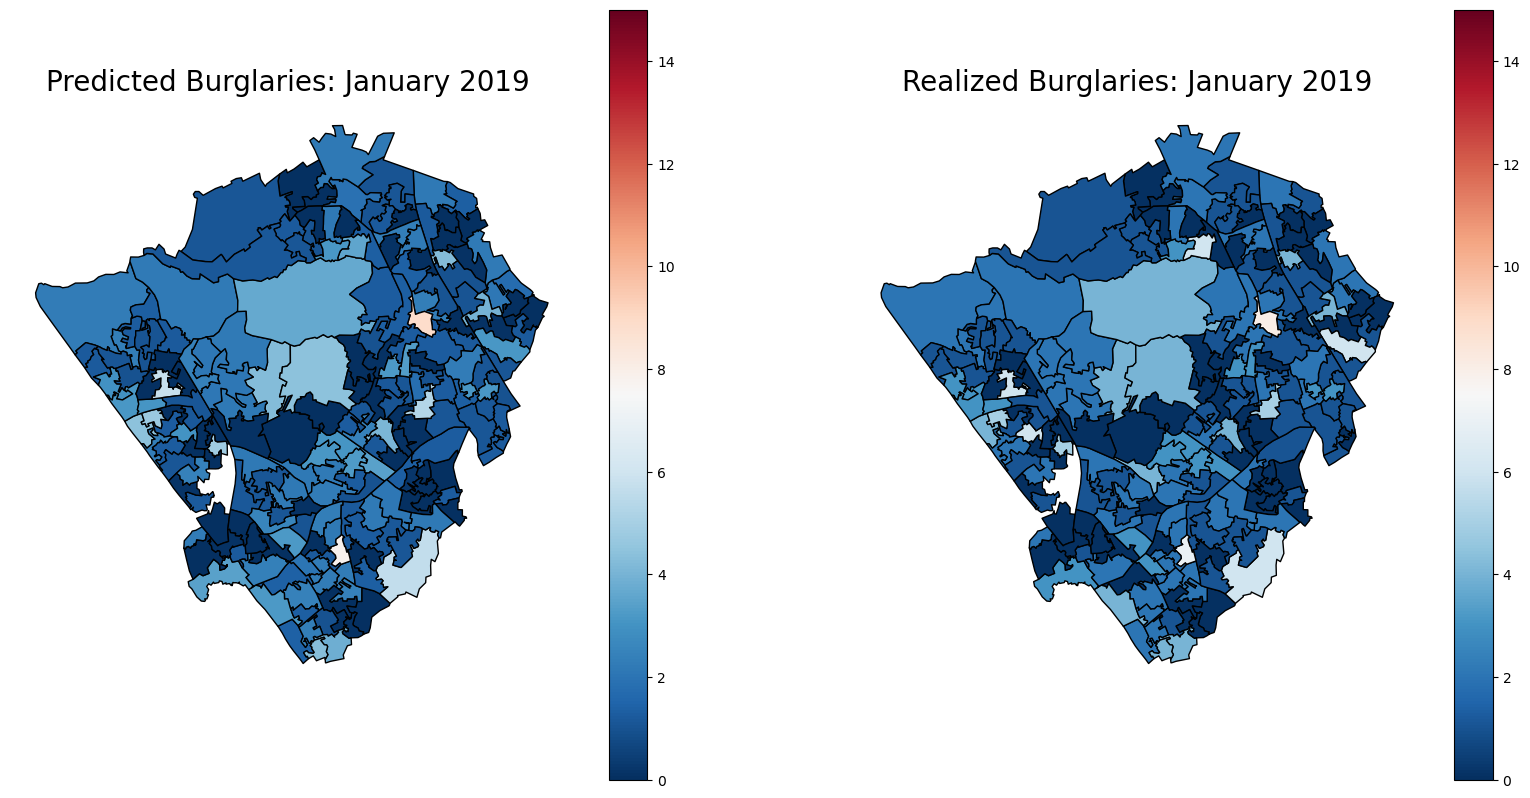

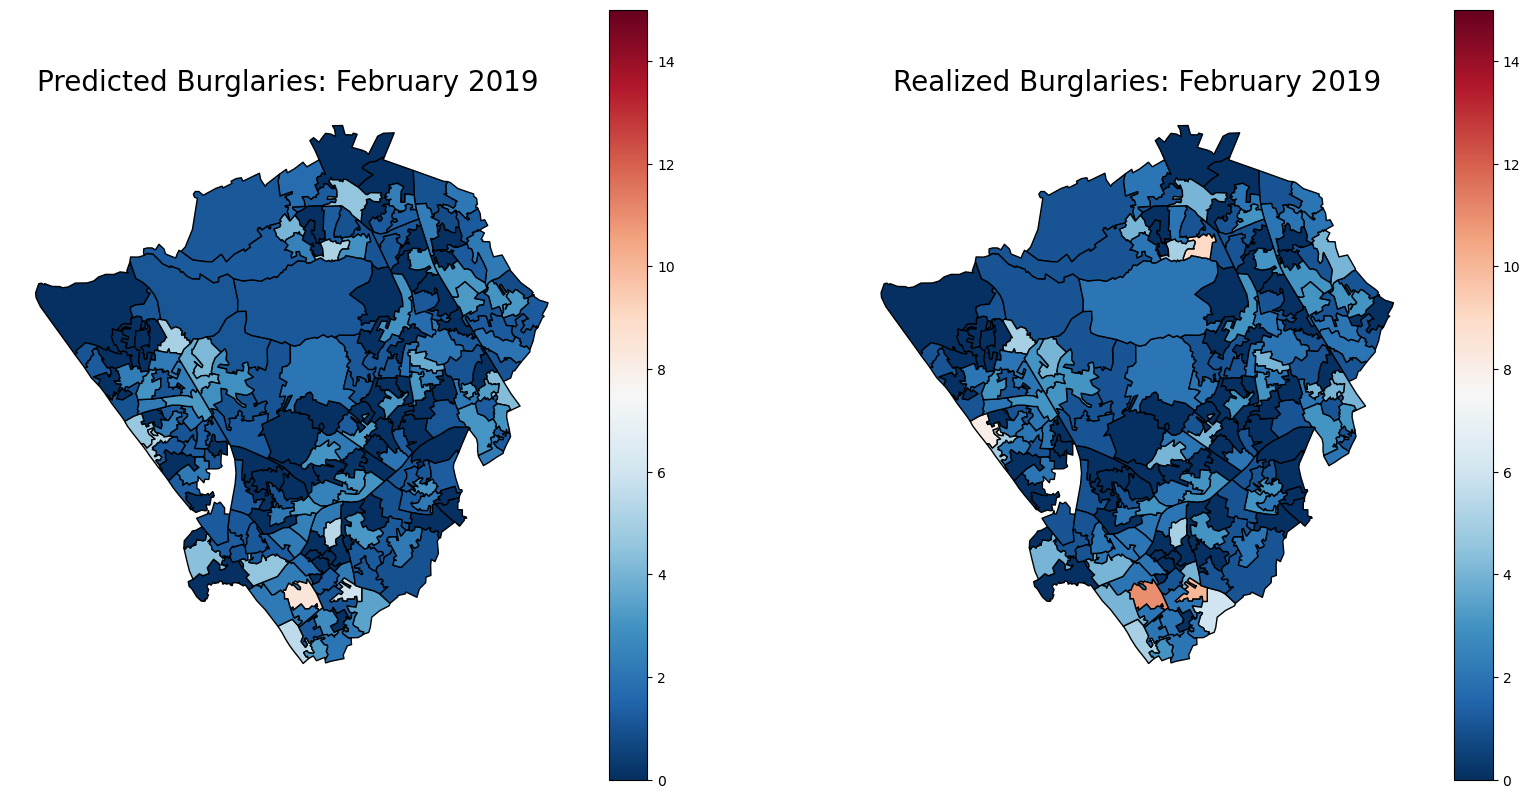

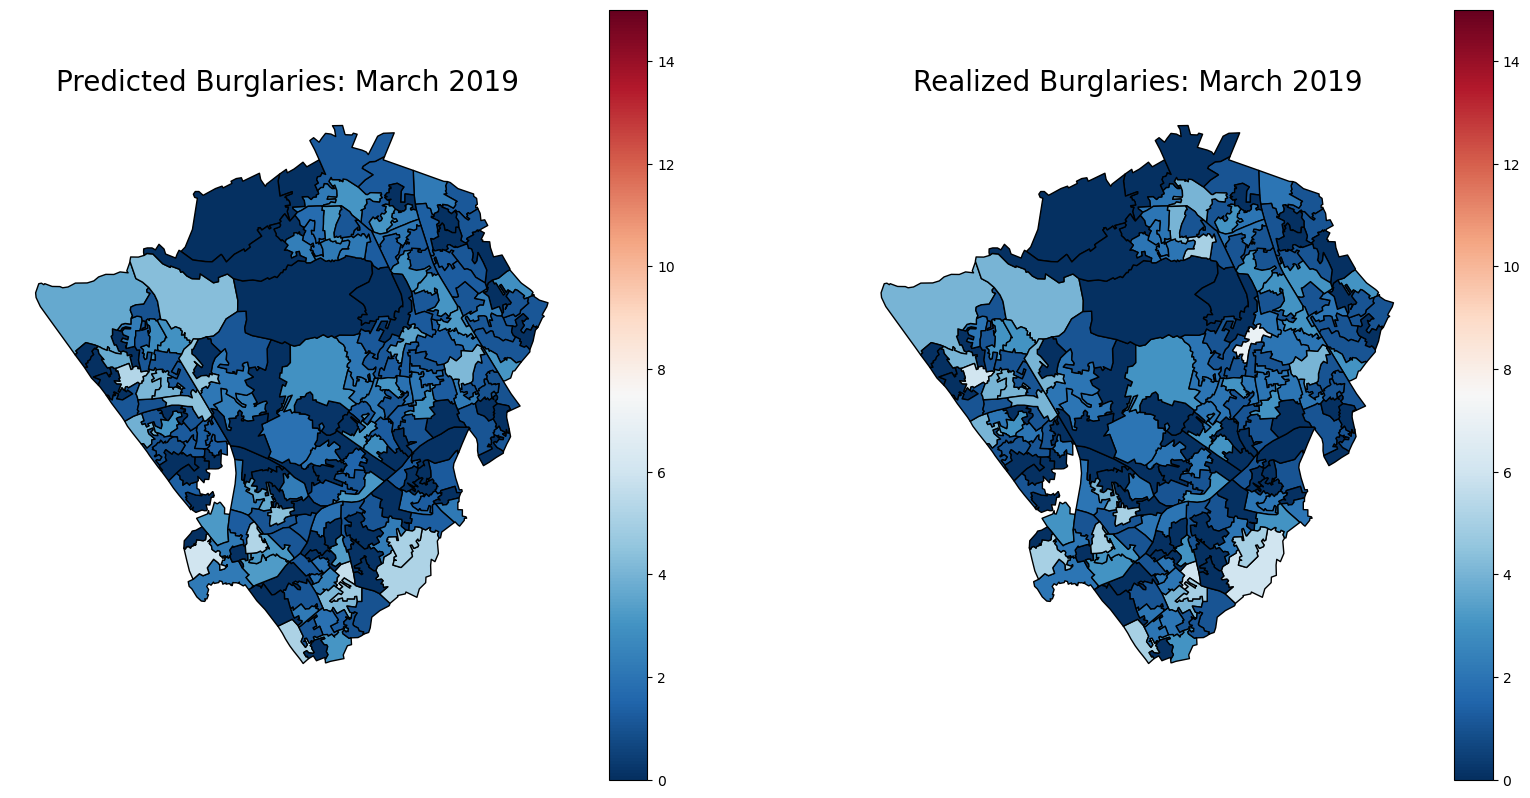

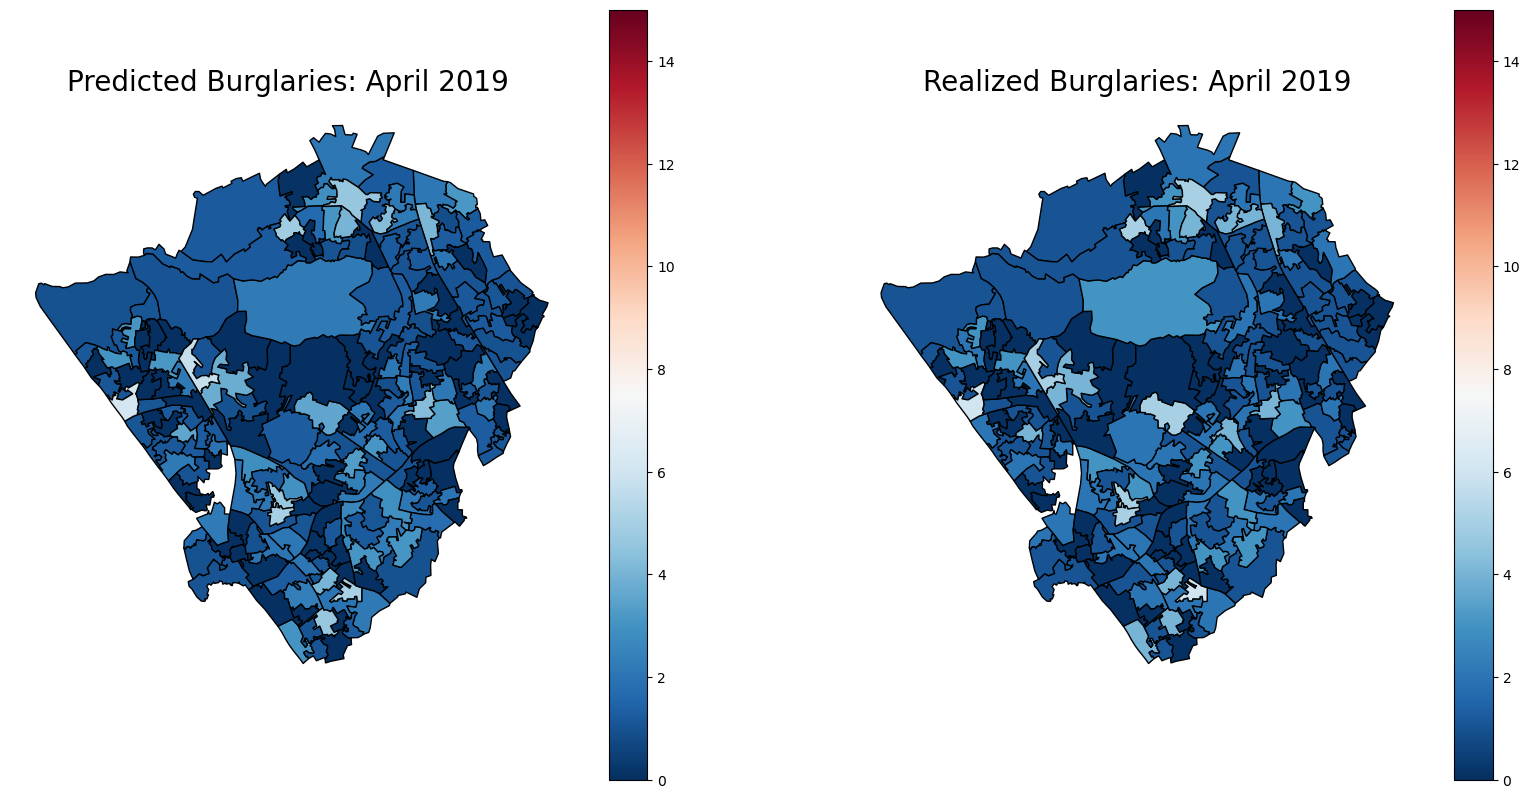

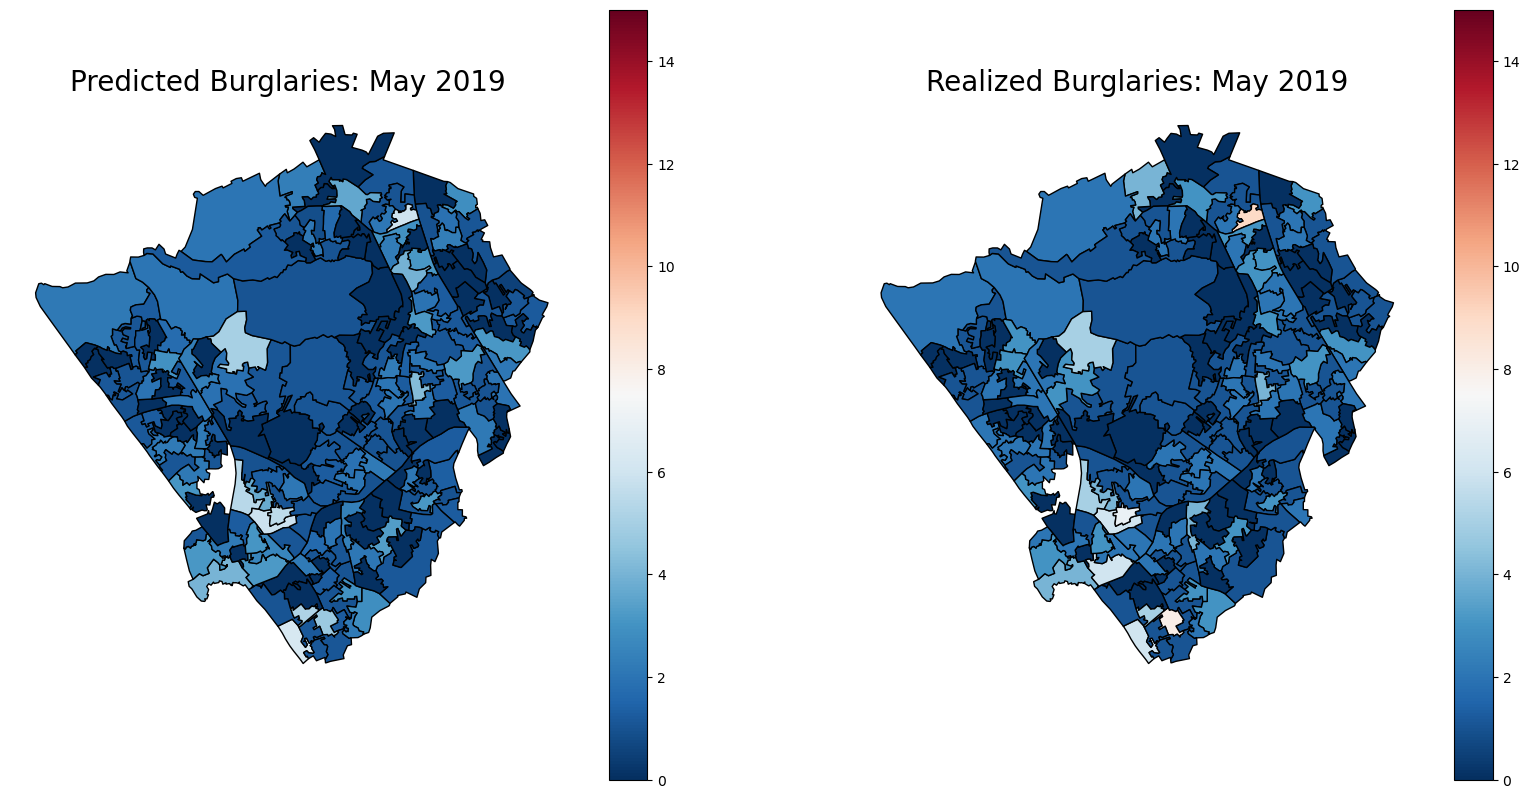

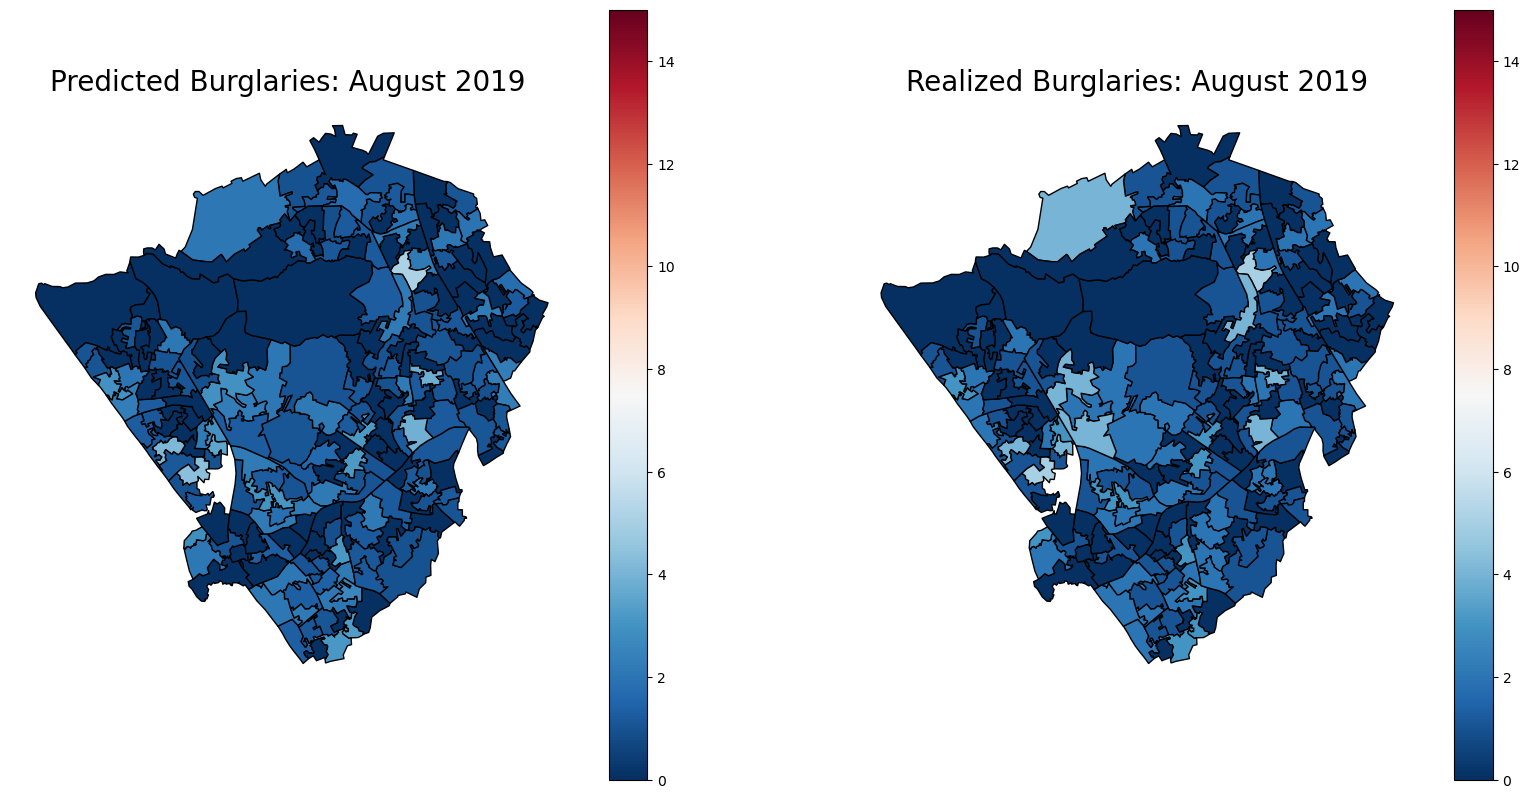

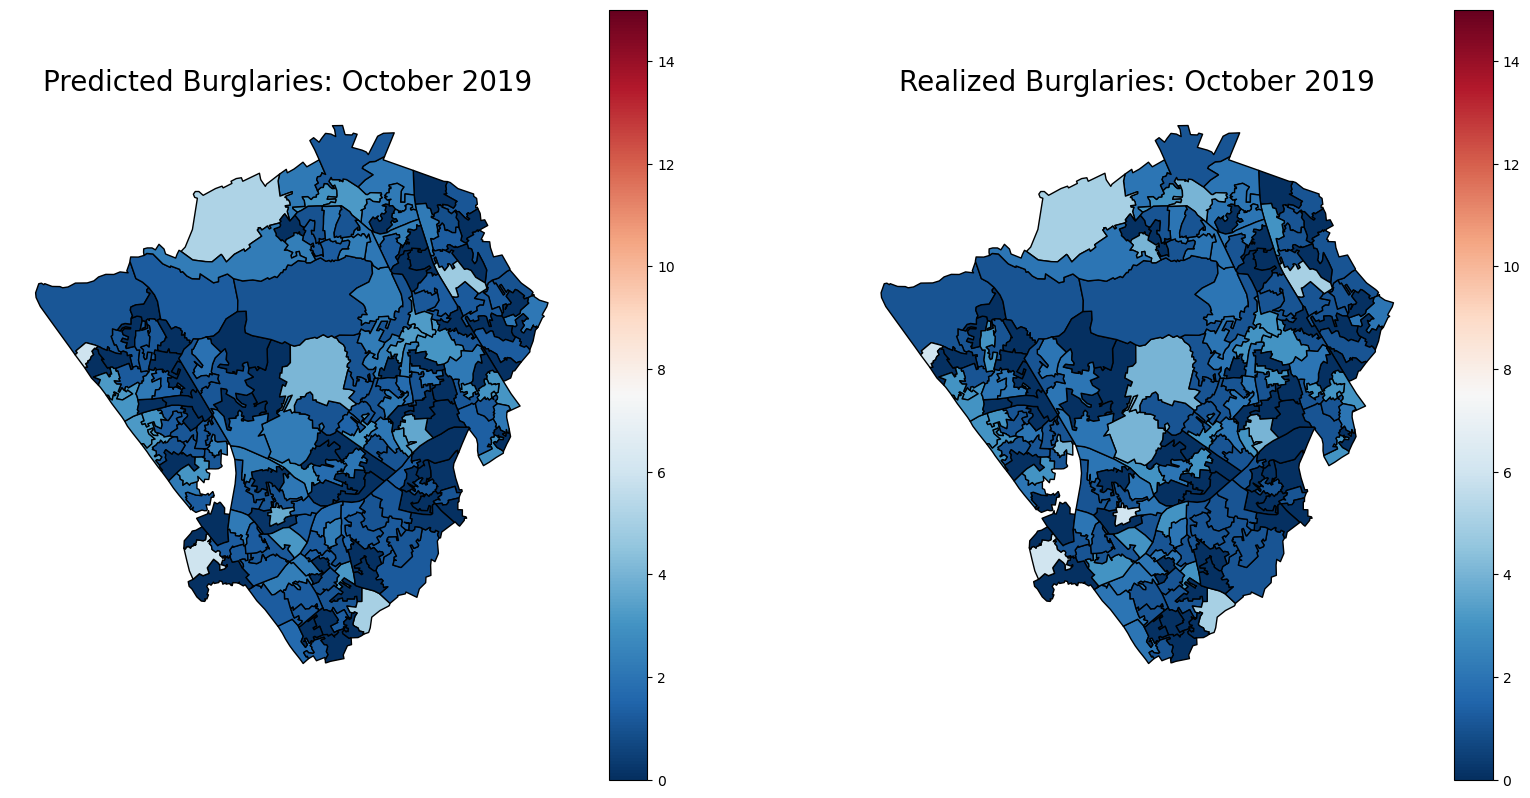

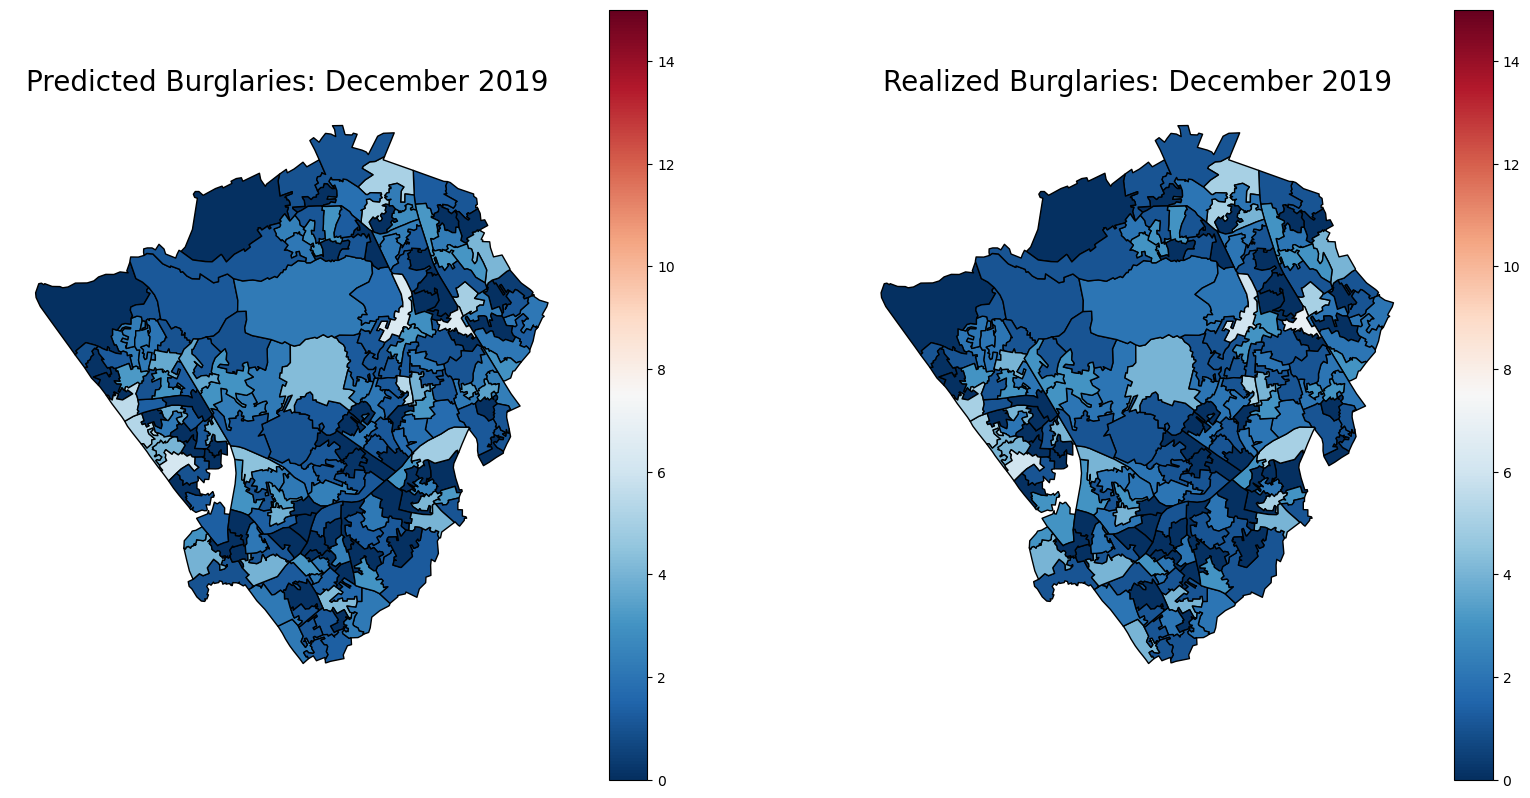

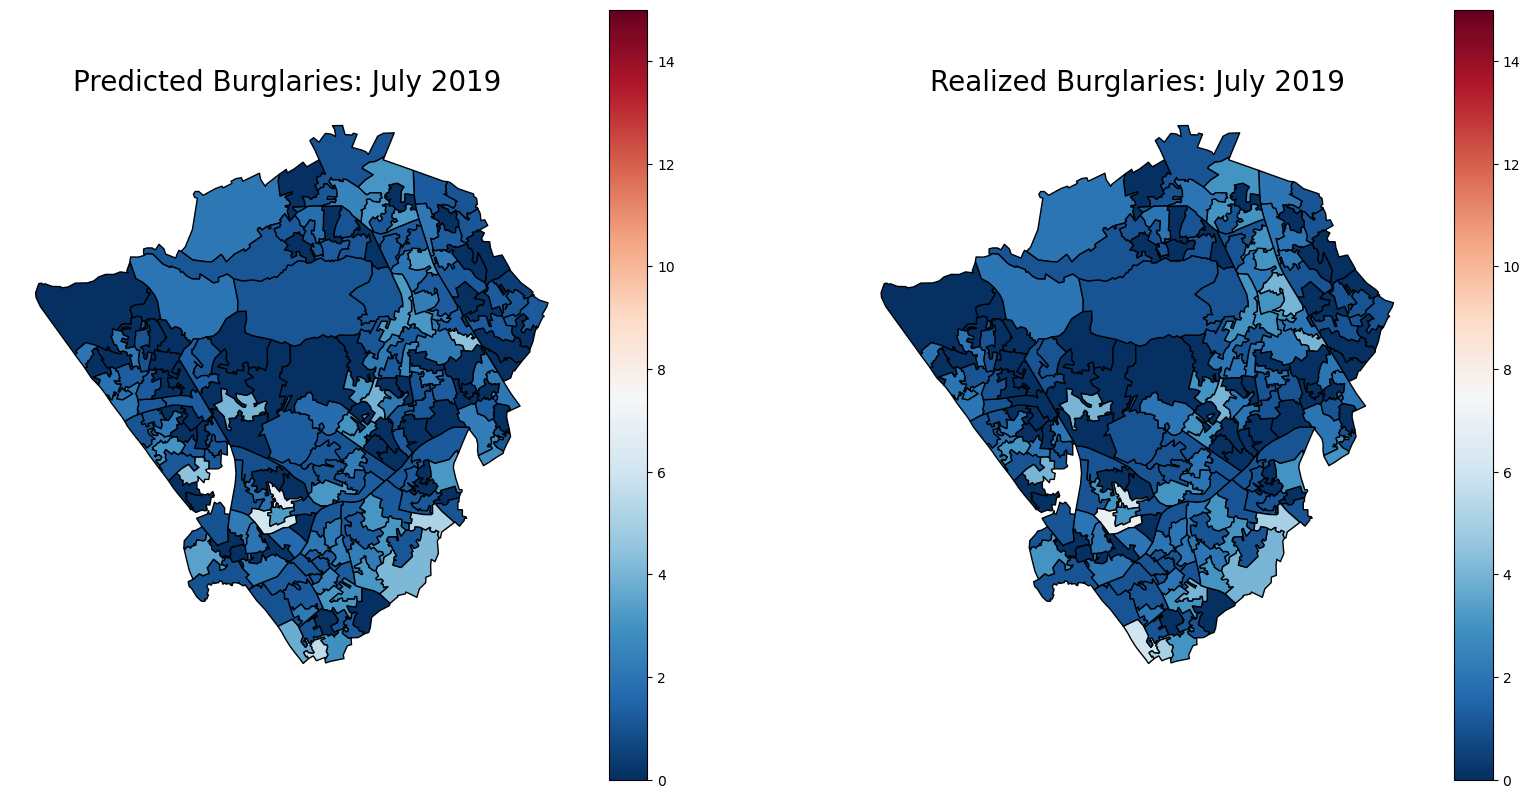

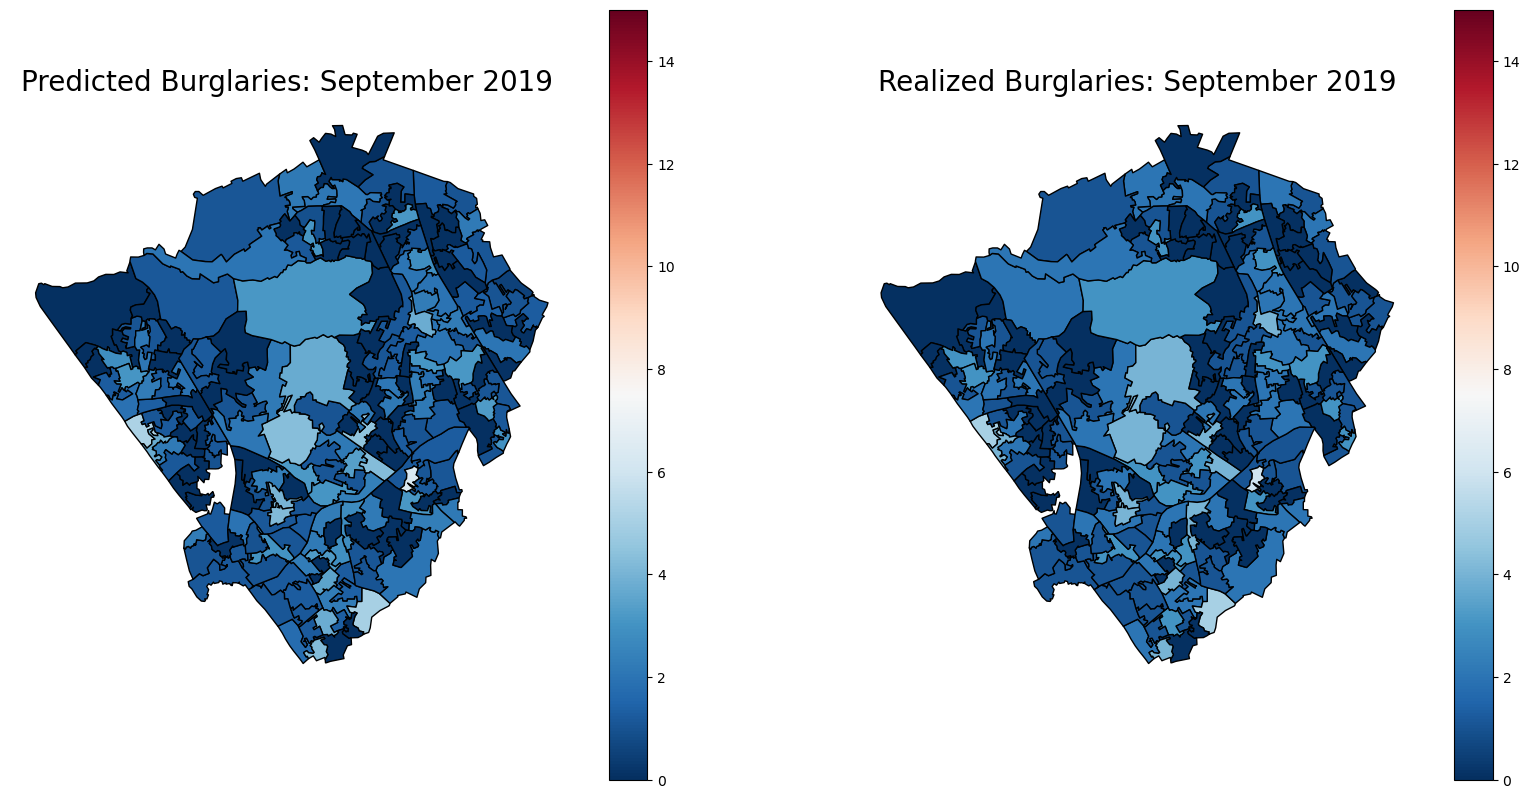

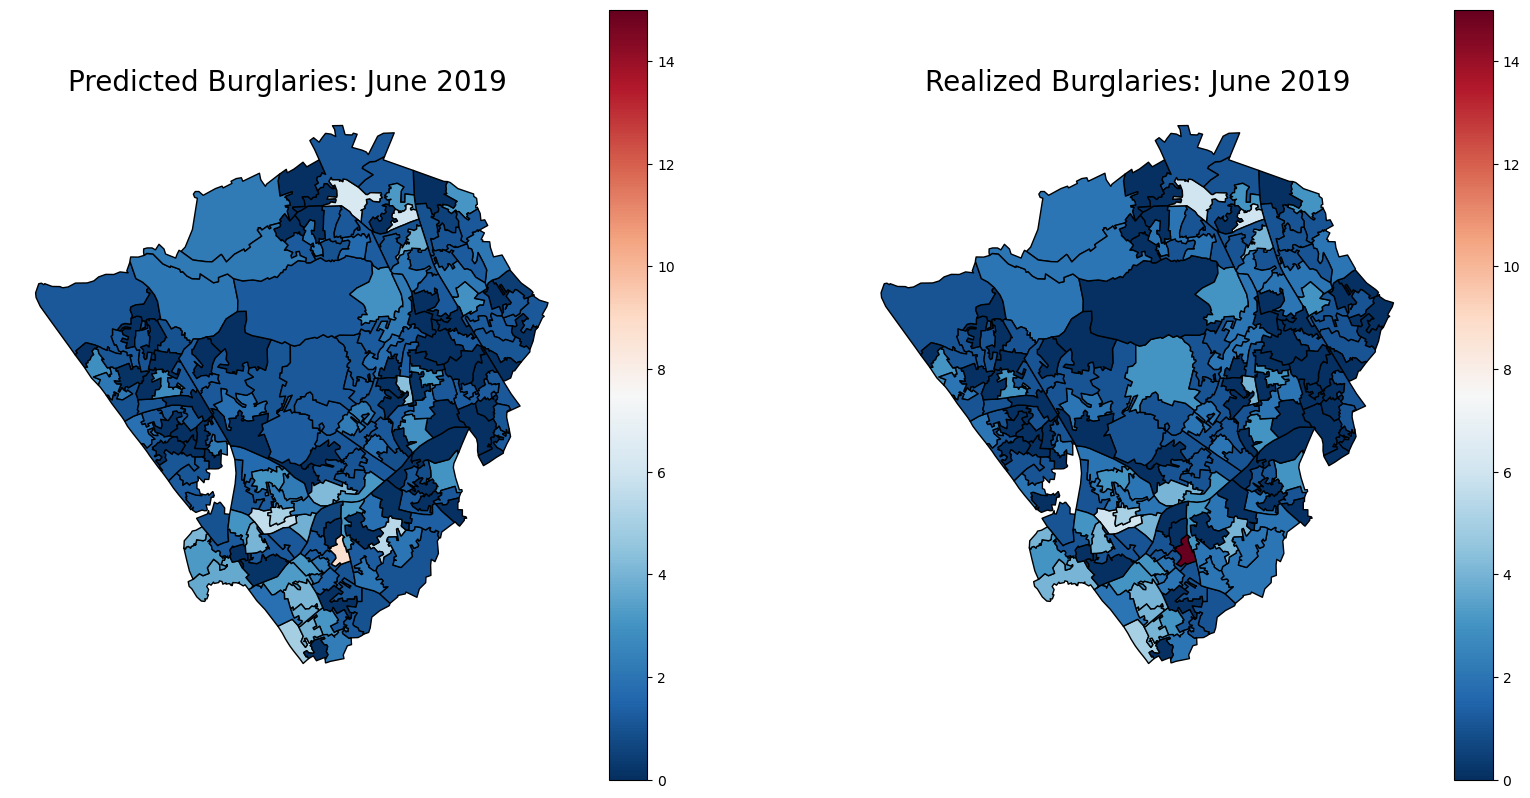

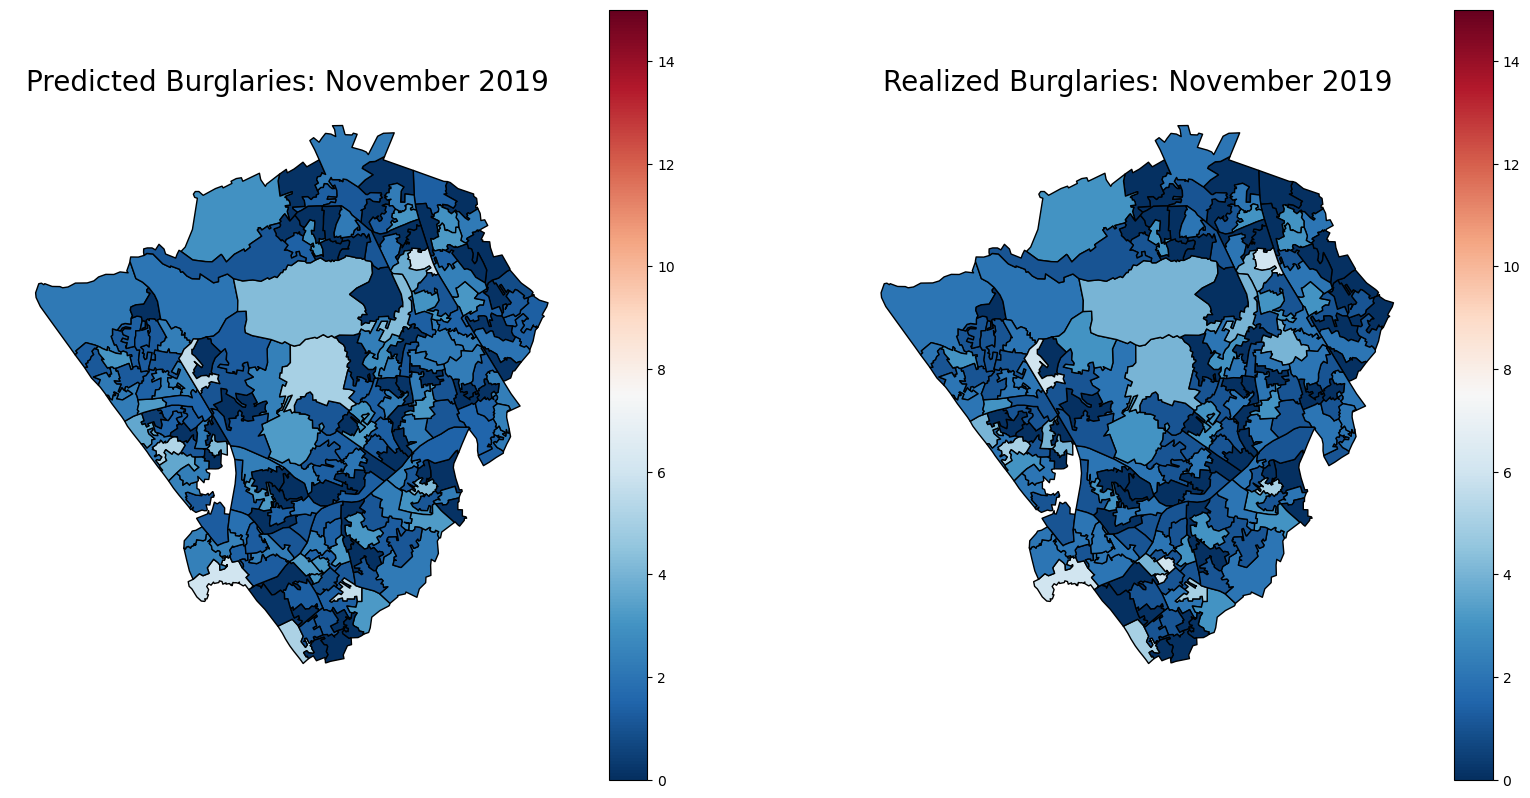

In [11]:
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
cwd = Path.cwd()
dc2 = cwd.parent
predSide = dc2.joinpath("data/img/predSide")
frames = []
for month in preDF["Month"].unique():
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

    filtered = preDF[preDF["Month"]==month]
    merged = pd.merge(barnet_map, filtered, on=["LSOA code"])
    merged.plot(column="Prediction", cmap="RdBu_r", edgecolors="black", vmin=0, vmax=15, legend=True, norm=plt.Normalize(vmin=0, vmax=15), ax=ax1)
    ax1.set_title(f"Predicted Burglaries: {month_dictionary[pd.to_datetime(month).month]} {pd.to_datetime(month).year} ", fontsize=20)

    merged.plot(column="Total Burglaries", cmap="RdBu_r", edgecolors="black", vmin=0, vmax=15, legend=True, norm=plt.Normalize(vmin=0, vmax=15), ax= ax2)
    ax1.axis("off")
    ax2.set_title(f"Realized Burglaries: {month_dictionary[pd.to_datetime(month).month]} {pd.to_datetime(month).year}", fontsize=20)
    ax2.axis("off")
    chart = fig.get_figure()
    frames.append(predSide.joinpath(f"{month}.png"))
    chart.savefig(predSide.joinpath(f"{month}"))



In [13]:
fs = []
for file in frames:
    image = Image.open(file)
    fs.append(image)
fs[0].save(predSide.joinpath("sideGif.gif"), format="GIF", append_images=fs[1:], save_all=True, duration=1000, loop=0)